# DATA COLLECTION

In [3]:
#libraries
import pandas as pd
import numpy as np
import pip
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy.stats as stats
import random

from scipy.stats import shapiro

In [4]:
path = "./dataset_project_eHealth20252026.csv"
dataset = pd.read_csv(path)
dataset.head(5)

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 96 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        220 non-null    float64
 1   gender     221 non-null    int64  
 2   education  220 non-null    float64
 3   marital    220 non-null    float64
 4   income     221 non-null    int64  
 5   audit_1    221 non-null    int64  
 6   audit_2    221 non-null    int64  
 7   audit_3    220 non-null    float64
 8   audit_4    221 non-null    int64  
 9   audit_5    220 non-null    float64
 10  audit_6    221 non-null    int64  
 11  audit_7    220 non-null    float64
 12  audit_8    220 non-null    float64
 13  audit_9    220 non-null    float64
 14  audit_10   219 non-null    float64
 15  dast_1     221 non-null    int64  
 16  dast_2     219 non-null    float64
 17  dast_3     220 non-null    float64
 18  dast_4     221 non-null    int64  
 19  dast_5     220 non-null    float64
 20  dast_6    

In [6]:
df = pd.DataFrame(dataset) #dataframe creation

In [7]:
print("Elenco colonne del dataset:")
for i, col in enumerate(df.columns):
    print(f"{i+1:02d}: {col}")

Elenco colonne del dataset:
01: age
02: gender
03: education
04: marital
05: income
06: audit_1
07: audit_2
08: audit_3
09: audit_4
10: audit_5
11: audit_6
12: audit_7
13: audit_8
14: audit_9
15: audit_10
16: dast_1
17: dast_2
18: dast_3
19: dast_4
20: dast_5
21: dast_6
22: dast_7
23: dast_8
24: dast_9
25: dast_10
26: pgsi_1
27: pgsi_2
28: pgsi_3
29: pgsi_4
30: pgsi_5
31: pgsi_6
32: pgsi_7
33: pgsi_8
34: pgsi_9
35: iat_1
36: iat_2
37: iat_3
38: iat_4
39: iat_5
40: iat_6
41: iat_7
42: iat_8
43: iat_9
44: iat_10
45: iat_11
46: iat_12
47: iat_13
48: iat_14
49: iat_15
50: iat_16
51: iat_17
52: iat_18
53: iat_19
54: iat_20
55: pcl5_1
56: pcl5_2
57: pcl5_3
58: pcl5_4
59: pcl5_5
60: pcl5_6
61: pcl5_7
62: pcl5_8
63: pcl5_9
64: pcl5_10
65: pcl5_11
66: pcl5_12
67: pcl5_13
68: pcl5_14
69: pcl5_15
70: pcl5_16
71: pcl5_17
72: pcl5_18
73: pcl5_19
74: pcl5_20
75: mspss_1
76: mspss_2
77: mspss_3
78: mspss_4
79: mspss_5
80: mspss_6
81: mspss_7
82: mspss_8
83: mspss_9
84: mspss_10
85: mspss_11
86: mspss

The dataset has 221 rows and 96 columns.

# DATA CLEANING

Deletion of duplicated rows.

In [8]:
df.duplicated() #check for duplicated rows and delete them

0      False
1      False
2      False
3      False
4      False
       ...  
216     True
217     True
218     True
219     True
220     True
Length: 221, dtype: bool

In [9]:
df = df.drop_duplicates()

In [10]:
df

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,1,1,0.0,0,0.0,...,4,1.0,4.0,0.0,0,0.0,3,3.0,3.0,1.0
196,21.0,0,18.0,1.0,38000,1,1,1.0,0,1.0,...,4,4.0,4.0,4.0,3,3.0,3,2.0,0.0,3.0
197,20.0,1,22.0,4.0,50000,2,2,0.0,2,1.0,...,7,7.0,7.0,1.0,7,3.0,5,5.0,5.0,3.0
198,39.0,0,8.0,1.0,22000,0,4,3.0,2,0.0,...,0,4.0,4.0,4.0,1,1.0,0,3.0,2.0,0.0


The deleted rows are 21, the dataset has 200 rows and 96 columns and it is saved in a new dataset named new_df.

In [11]:
new_df = df.copy()

Replace all different representations of missing or empty values in the DataFrame (e.g., empty strings, "NA", "N/A", "nan", "missing", None, etc.) with a consistent NaN value recognized by pandas for easier data cleaning and analysis.

In [12]:
new_df = new_df.replace(
    ["", " ", "NA", "N/A", "na", "NaN", "nan", "missing", "None", None, pd.NaT, pd.NA],
    np.nan
)

## Handling Missing Values

The dataset contains some missing values. These are not necessarily due to data collection errors — in some cases, they result from the questionnaire structure (skip logic), where certain responses are implicitly determined by previous answers. Therefore, the missing data are assumed to follow a "Missing At Random" (MAR) mechanism rather than being "Missing Completely At Random" (MCAR). 
However, for analytical purposes, we treat them as completely random, assuming no systematic bias is introduced.
Imputation Strategy:
- Categorical variables  -> mode
- Binary variables (0/1) -> mode
- Continuous / Likert-scale variables -> mean if |skew| <= 0.5, else median
- Label columns are excluded from imputation

This approach helps preserve data consistency while minimizing distortion in the overall distribution. Before imputation, null-like string values are normalized to ensure correct detection and replacement.


In [13]:
# ===========================================
# Imputazione basata su simmetria (skewness)
# - Likert/continue: mean se |skew|<=0.5, altrimenti median
# - Categoriali codificate: moda
# - Binari (0/1): moda
# - Labels: non toccare
# - Normalizza null stringhe prima
# ===========================================

# helper
def safe_mode(s):
    m = s.mode(dropna=True)
    return m.iloc[0] if len(m) else np.nan

# 1) definisci gruppi noti
label_cols = [c for c in new_df.columns if c.endswith("_label") or c.endswith("_labels")]
cat_code_cols = [c for c in ["gender", "education", "marital"] if c in new_df.columns]
binary_cols = [c for c in new_df.columns if c.startswith("dast_")]  # DAST è 0/1
# aggiungi eventuali altre colonne 0/1 rilevate automaticamente
for c in new_df.columns:
    if c in binary_cols or c in label_cols:
        continue
    vals = pd.to_numeric(new_df[c], errors="coerce")
    uniq = set(vals.dropna().unique())
    if uniq.issubset({0, 1}) and c not in binary_cols:
        binary_cols.append(c)

# 2) converti in numerico dove serve (senza toccare labels e categoriche codificate)
numeric_candidates = [c for c in new_df.columns if c not in label_cols]
for c in numeric_candidates:
    new_df[c] = pd.to_numeric(new_df[c], errors="coerce")

# 3) report pre
nan_before = new_df.isna().sum().to_dict()
decisions = []

# 4) imputazioni
# 4a) categoriche codificate -> moda
for c in cat_code_cols:
    if c in new_df.columns:
        val = safe_mode(new_df[c])
        new_df[c] = new_df[c].fillna(val)
        decisions.append((c, "mode (categorical)"))

# 4b) binari (DAST + auto-0/1) -> moda
for c in binary_cols:
    if c in new_df.columns and c not in cat_code_cols:
        val = safe_mode(new_df[c])
        new_df[c] = new_df[c].fillna(val)
        decisions.append((c, "mode (binary)"))

# 4c) tutte le altre colonne numeriche -> mean/median in base a skew
for c in new_df.columns:
    if c in label_cols or c in cat_code_cols or c in binary_cols:
        continue
    # considera solo colonne numeriche reali
    if not pd.api.types.is_numeric_dtype(new_df[c]):
        continue
    s = new_df[c].dropna()
    if s.empty:
        continue
    skew = s.skew()  # skewness di Pandas (Fisher-Pearson)
    if np.isfinite(skew) and abs(skew) <= 0.5:
        fill_val = s.mean()
        method = "mean (|skew|<=0.5)"
    else:
        fill_val = s.median()
        method = "median (|skew|>0.5)"
    new_df[c] = new_df[c].fillna(fill_val)
    decisions.append((c, f"{method}; skew={skew:.2f}"))

# 5) report post
nan_after = new_df.isna().sum().to_dict()
fixed_per_col = {c: int(nan_before.get(c,0) - nan_after.get(c,0)) for c in new_df.columns}

print("=== Imputation decisions (first 30) ===")
for name, how in decisions[:30]:
    print(f"{name:>20} -> {how}")

print("\n=== NaN replaced per column (top 20) ===")
for col, nfix in sorted(fixed_per_col.items(), key=lambda x: x[1], reverse=True)[:20]:
    if nfix > 0:
        print(f"{col:>20}: {nfix}")

print("\nTotale NaN sostituiti:", sum(fixed_per_col.values()))


=== Imputation decisions (first 30) ===
              gender -> mode (categorical)
           education -> mode (categorical)
             marital -> mode (categorical)
              dast_1 -> mode (binary)
              dast_2 -> mode (binary)
              dast_3 -> mode (binary)
              dast_4 -> mode (binary)
              dast_5 -> mode (binary)
              dast_6 -> mode (binary)
              dast_7 -> mode (binary)
              dast_8 -> mode (binary)
              dast_9 -> mode (binary)
             dast_10 -> mode (binary)
                 age -> mean (|skew|<=0.5); skew=0.11
              income -> median (|skew|>0.5); skew=1.05
             audit_1 -> median (|skew|>0.5); skew=1.19
             audit_2 -> median (|skew|>0.5); skew=1.04
             audit_3 -> median (|skew|>0.5); skew=1.11
             audit_4 -> median (|skew|>0.5); skew=1.17
             audit_5 -> median (|skew|>0.5); skew=1.05
             audit_6 -> median (|skew|>0.5); skew=1.12
            

In [14]:
new_df

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,1,1,0.0,0,0.0,...,4,1.0,4.0,0.0,0,0.0,3,3.0,3.0,1.0
196,21.0,0,18.0,1.0,38000,1,1,1.0,0,1.0,...,4,4.0,4.0,4.0,3,3.0,3,2.0,0.0,3.0
197,20.0,1,22.0,4.0,50000,2,2,0.0,2,1.0,...,7,7.0,7.0,1.0,7,3.0,5,5.0,5.0,3.0
198,39.0,0,8.0,1.0,22000,0,4,3.0,2,0.0,...,0,4.0,4.0,4.0,1,1.0,0,3.0,2.0,0.0


# EDA (Exploratory Data Analysis)

After creating a data visualization set via a histogram, it is a very useful tool to ensure that the normality requirement is satisfied through Shapiro-Wilk test.
- Histograms allow the visualization of data symmetry (skewness), detection of outliers, and verification that no artificial distortions were introduced during imputation.
- The normality of the distributions for age, gender, education, marital status and income is tested, and all variables showed non-normal distributions. Assessing the normality of these variables is an essential preliminary step, as it guides the selection of appropriate statistical methods for subsequent analyses.


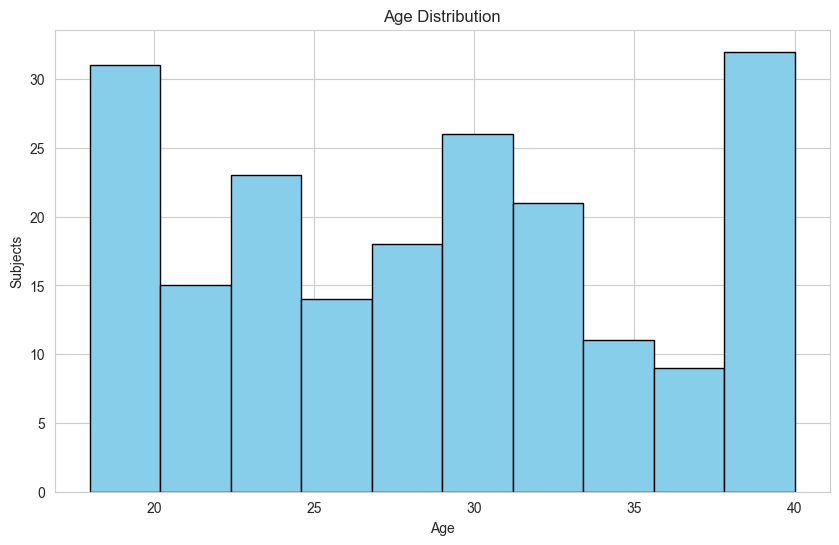

Shapiro-Wilk test statistic: 0.9423
P-value: 0.0000
The age distribution is NOT normal.


In [15]:
# Histrogram
plt.figure(figsize=(10, 6))
plt.hist(new_df['age'], color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Subjects')
plt.title('Age Distribution')
#plt.grid(True)
plt.show()

# Apply Shapiro-Wilk test on the 'age' column
stat, p_value = shapiro(new_df['age'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The age distribution is normal.")
else:
    print("The age distribution is NOT normal.")

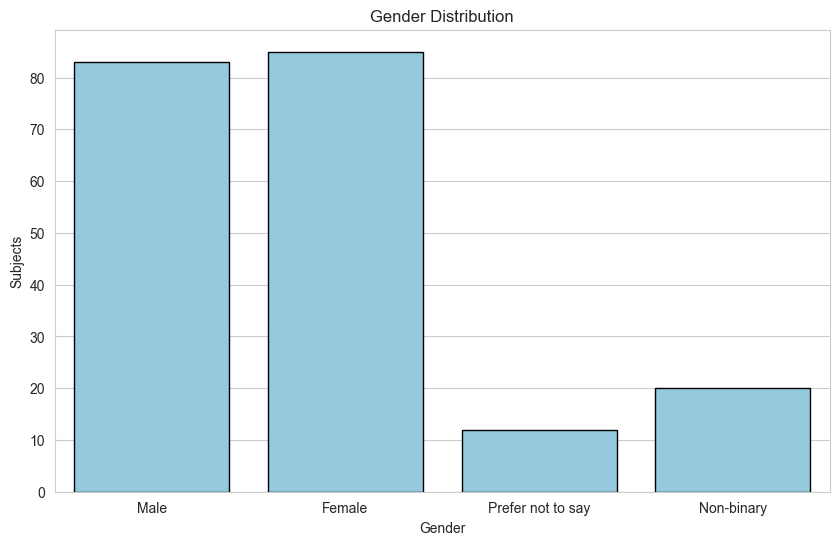

Shapiro-Wilk test statistic: 0.7891
P-value: 0.0000
The gender distribution is NOT normal.


In [16]:
#[0] Male [1] Female [2] Non-binary [3] Prefer not to say

# Replace numeric codes with labels
gender_labels = {
    0: 'Male',
    1: 'Female',
    2: 'Non-binary',
    3: 'Prefer not to say'
}
new_df['gender_label'] = new_df['gender'].map(gender_labels)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='gender_label', color='skyblue',edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Subjects')
plt.title('Gender Distribution')
#plt.xticks(rotation=15)
#plt.grid(True)
plt.show()

# Apply Shapiro-Wilk test on the 'gender' column
stat, p_value = shapiro(new_df['gender'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The gender distribution is normal.")
else:
    print("The gender distribution is NOT normal.")


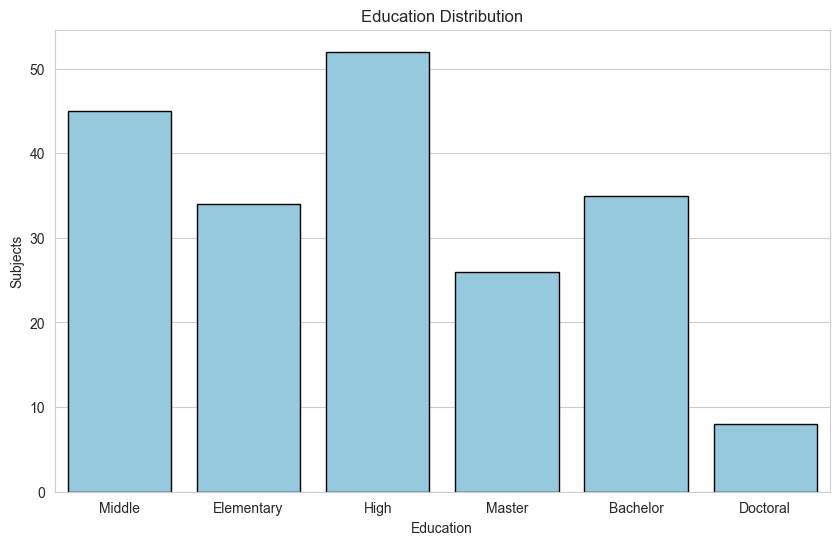

Shapiro-Wilk test statistic: 0.9039
P-value: 0.0000
The education distribution is NOT normal.


In [17]:
#[5] Elementary school [8] Middle school [13] High School [18]Bachelor's Degree [22] Master's Degree [25] Doctoral Degree

# Replace numeric codes with labels
school_labels = {
    5: 'Elementary',
    8: 'Middle',
    13: 'High',
    18: 'Bachelor',
    22: 'Master',
    25: 'Doctoral'
}
new_df['school_labels'] = new_df['education'].map(school_labels)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='school_labels', color='skyblue',edgecolor='black')
plt.xlabel('Education')
plt.ylabel('Subjects')
plt.title('Education Distribution')
#plt.xticks(rotation=15)
#plt.grid(True)
plt.show()

# Apply Shapiro-Wilk test on the 'education' column
stat, p_value = shapiro(new_df['education'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The education distribution is normal.")
else:
    print("The education distribution is NOT normal.")

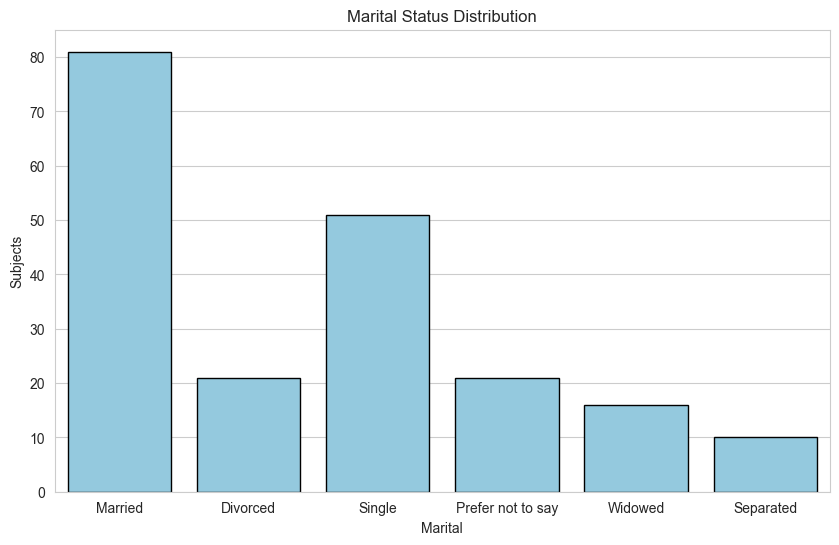

Shapiro-Wilk test statistic: 0.8090
P-value: 0.000000000
The marital status distribution is NOT normal.


In [18]:
#[5] [0] Single [1] Married [2] Divorced [3] Widowed [4] Separated [5] Prefer not to say

# Replace numeric codes with labels
marital_labels = {
    0: 'Single',
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Prefer not to say'
}
new_df['marital_labels'] = new_df['marital'].map(marital_labels)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='marital_labels', color='skyblue',edgecolor='black')
plt.xlabel('Marital')
plt.ylabel('Subjects')
plt.title('Marital Status Distribution')
#plt.xticks(rotation=15)
plt.show()

# Apply Shapiro-Wilk test on the 'marital' column
stat, p_value = shapiro(new_df['marital'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.9f}")

if p_value > 0.05:
    print("The marital status distribution is normal.")
else:
    print("The marital status distribution is NOT normal.")

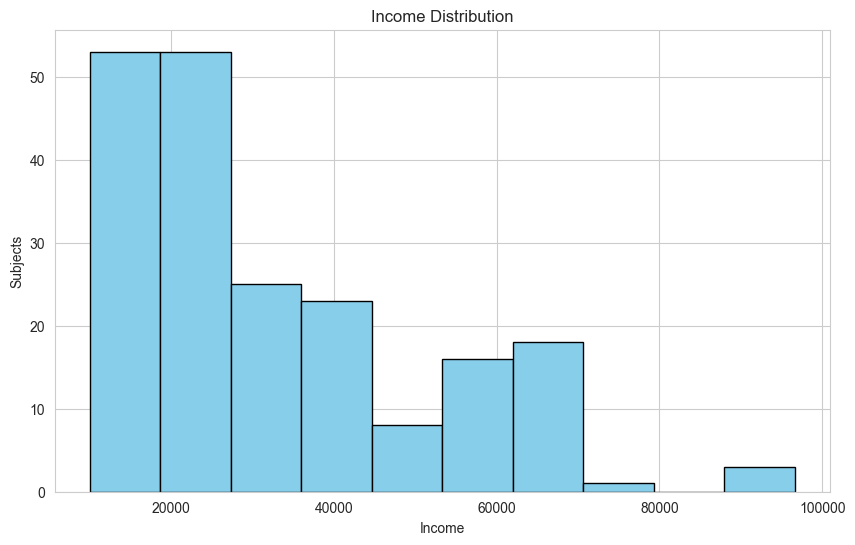

Shapiro-Wilk test statistic: 0.8894
P-value: 0.0000
The income distribution is NOT normal.


In [19]:
# Histrogram
plt.figure(figsize=(10, 6))
plt.hist(new_df['income'], color='skyblue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Subjects')
plt.title('Income Distribution')
#plt.grid(True)
plt.show()

# Apply Shapiro-Wilk test on the 'income' column
stat, p_value = shapiro(new_df['income'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The income distribution is normal.")
else:
    print("The income distribution is NOT normal.")

Verifying the absence of normality supports the use of non-parametric correlation tests (e.g., Spearman’s rho) when exploring relationships between sociodemographic characteristics and behavioral traits relevant to the development of player personas for the game.

## Column processing

In order to focus on internet addiction, let's drop out all the indices related to other addictions:
- dropped columns --> AUDIT (Alcohol Use Disorders Identification Test), DAST (Drug Abuse Screening Test)
- maintained cols --> PGSI (Problem Gambling Severity Index), PCL-5 (PTSD Checklist for DSM-5), MSPSS (Multidimensional Scale of Perceived Social Support), SWLS (Satisfaction With Life Scale), WHO-5 (Well-Being Index)

In [20]:
# Identify columns related to AUDIT, DAST, and PGSI
cols_to_remove = [col for col in new_df.columns if col.lower().startswith(('audit','dast'))]

# Drop those columns
df_filtered = new_df.drop(columns=cols_to_remove)

# Save cleaned dataset
# df_filtered.to_csv('dataset_eHealth20252026_noAUDIT_DAST_PGSI.csv', index=False)

In [21]:
df_filtered

,age,gender,education,marital,income,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,...,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels
0,39.0,0,8.0,1.0,14000,3.0,3,3.0,0,3,...,2.0,0,2.0,3,3.0,3.0,2.0,Male,Middle,Married
1,18.0,1,5.0,1.0,25000,0.0,0,0.0,3,0,...,4.0,4,0.0,0,3.0,2.0,2.0,Female,Elementary,Married
2,40.0,0,13.0,2.0,56000,0.0,0,0.0,0,0,...,0.0,2,3.0,2,3.0,2.0,3.0,Male,High,Divorced
3,24.0,1,22.0,0.0,35000,0.0,0,0.0,0,0,...,3.0,4,3.0,2,1.0,2.0,3.0,Female,Master,Single
4,19.0,1,22.0,1.0,42000,0.0,0,0.0,0,0,...,5.0,7,5.0,5,4.0,3.0,3.0,Female,Master,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,0.0,0,0.0,0,0,...,0.0,0,0.0,3,3.0,3.0,1.0,Male,High,Married
196,21.0,0,18.0,1.0,38000,0.0,0,0.0,0,0,...,4.0,3,3.0,3,2.0,0.0,3.0,Male,Bachelor,Married
197,20.0,1,22.0,4.0,50000,0.0,0,0.0,1,0,...,1.0,7,3.0,5,5.0,5.0,3.0,Female,Master,Separated
198,39.0,0,8.0,1.0,22000,3.0,3,3.0,3,2,...,4.0,1,1.0,0,3.0,2.0,0.0,Male,Middle,Married


## Shapiro-Wilk test
Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed.

It’s a widely-used statistical tool that can help us find an answer to the normality check we need, but it has one flaw: It doesn’t work well with large data sets. The maximum allowed size for a data set depends on the implementation. For example, for samples larger than 5,000, the Shapiro-Wilk test with SciPy in Python still runs, but it issues a warning that the p-value may not be accurate due to limitations in the test’s underlying assumptions.

https://builtin.com/data-science/shapiro-wilk-test

In [22]:
results = []
for i in range(1, 21):
    col = f'iat_{i}'
    data = df_filtered[col].dropna()
    stat, p = shapiro(data)
    results.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results)
result_df.head(10)

,column,statistic,p_value,alpha,normal
0,iat_1,0.901923,3.336925e-10,0.05,False
1,iat_2,0.901642,3.200776e-10,0.05,False
2,iat_3,0.895352,1.284029e-10,0.05,False
3,iat_4,0.883647,2.570883e-11,0.05,False
4,iat_5,0.902375,3.569170e-10,0.05,False
5,iat_6,0.898295,1.959786e-10,0.05,False
6,iat_7,0.887740,4.454975e-11,0.05,False
7,iat_8,0.890957,6.927039e-11,0.05,False
8,iat_9,0.881595,1.960928e-11,0.05,False
9,iat_10,0.865863,2.711615e-12,0.05,False


Since the Shapiro–Wilk tests indicated that the IAT item distributions are not normally distributed (p < 0.05 for all items), a non-parametric correlation measure was considered more appropriate. For this reason, the *Spearman correlation* test was applied to assess the degree of association among the IAT items.

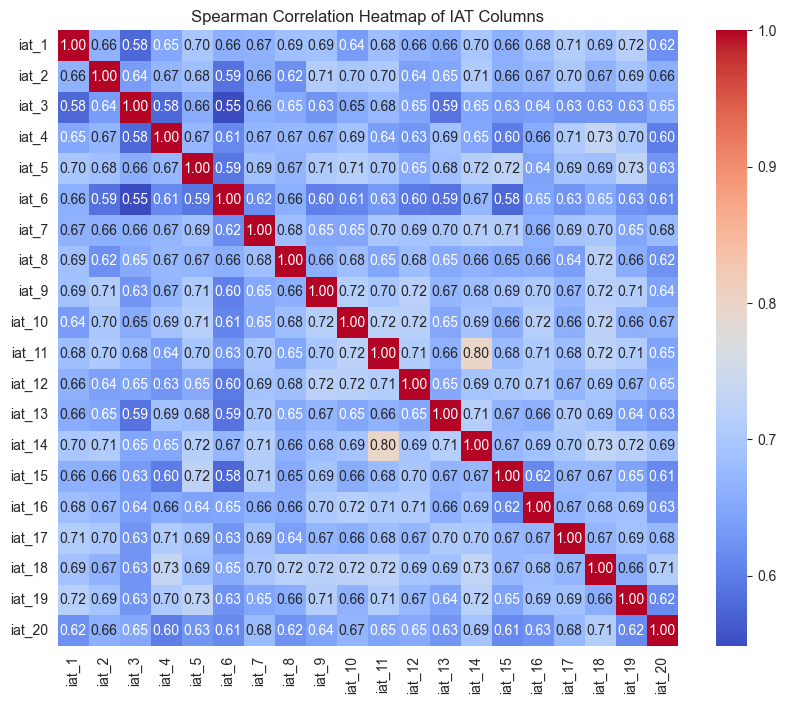

In [23]:
# Select only IAT columns
iat_cols = [col for col in df_filtered.columns if col.startswith('iat_')]
df_iat = df_filtered[iat_cols]

# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_iat = df_iat.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_iat, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of IAT Columns")
plt.show()

In [24]:
# Extract upper triangle (excluding diagonal)
corr_values_iat = corr_matrix_iat.where(~np.eye(corr_matrix_iat.shape[0], dtype=bool)).stack()

# Compute min and max
min_corr_iat = corr_values_iat.min()
max_corr_iat = corr_values_iat.max()

print(f"Minimum Spearman correlation (excluding diagonal): {min_corr_iat:.2f}")
print(f"Maximum Spearman correlation (excluding diagonal): {max_corr_iat:.2f}")

Minimum Spearman correlation (excluding diagonal): 0.55
Maximum Spearman correlation (excluding diagonal): 0.80


The strong positive correlations found between the items confirm their internal consistency, meaning that the individual variables tend to measure the same underlying construct. Given this internal coherence, it is therefore reasonable to compute a composite score by summing all IAT item values for each participant. This sum reflects the overall IAT index and serves as a representative measure of the latent trait captured by the individual items.

## Cronbach’s Alpha
The use of Cronbach’s Alpha in this context is justified by the nature of the IAT variables. Each IAT item (iat_1 to iat_20) represents an ordinal or interval-type variable derived from Likert-like responses, all intended to measure the same underlying psychological construct. After verifying that the distributions of the IAT items are not normal through the Shapiro–Wilk test, and that they are strongly intercorrelated based on the Spearman correlation matrix, it is appropriate to assess their internal consistency.
Cronbach’s Alpha provides a reliability coefficient that quantifies how closely related a set of items are as a group. In other words, it measures the degree to which all the IAT items collectively capture the same latent dimension. A high alpha value (typically above 0.9) indicates excellent internal consistency, confirming that the items can be combined into a single composite score.
For this reason, computing Cronbach’s Alpha allows us to statistically validate the decision to aggregate all IAT items into a single index by summing their values for each participant. This composite IAT score can then be interpreted as a reliable representation of the overall construct measured by the individual items.

https://how.dev/answers/how-to-implement-cronbachs-alpha-for-reliability-in-python

In [25]:
def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every
    # relevant correlation to an array called 'r_s'. Then, we'll
    # calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha


## IAT

In [26]:
cronbach_alpha(df_iat)

np.float64(0.9728868862081862)

In [27]:
#specify the columns to sum
cols_to_sum = [col for col in df_filtered.columns if col.lower().startswith(('iat'))]

#define new column that contains sum of specific columns
df_filtered['sum_iat'] = df_filtered[cols_to_sum].sum(axis=1)

#view updated DataFrame
df_filtered

,age,gender,education,marital,income,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,...,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels,sum_iat
0,39.0,0,8.0,1.0,14000,3.0,3,3.0,0,3,...,0,2.0,3,3.0,3.0,2.0,Male,Middle,Married,39.000000
1,18.0,1,5.0,1.0,25000,0.0,0,0.0,3,0,...,4,0.0,0,3.0,2.0,2.0,Female,Elementary,Married,33.000000
2,40.0,0,13.0,2.0,56000,0.0,0,0.0,0,0,...,2,3.0,2,3.0,2.0,3.0,Male,High,Divorced,60.000000
3,24.0,1,22.0,0.0,35000,0.0,0,0.0,0,0,...,4,3.0,2,1.0,2.0,3.0,Female,Master,Single,56.000000
4,19.0,1,22.0,1.0,42000,0.0,0,0.0,0,0,...,7,5.0,5,4.0,3.0,3.0,Female,Master,Married,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,0.0,0,0.0,0,0,...,0,0.0,3,3.0,3.0,1.0,Male,High,Married,66.000000
196,21.0,0,18.0,1.0,38000,0.0,0,0.0,0,0,...,3,3.0,3,2.0,0.0,3.0,Male,Bachelor,Married,68.000000
197,20.0,1,22.0,4.0,50000,0.0,0,0.0,1,0,...,7,3.0,5,5.0,5.0,3.0,Female,Master,Separated,11.000000
198,39.0,0,8.0,1.0,22000,3.0,3,3.0,3,2,...,1,1.0,0,3.0,2.0,0.0,Male,Middle,Married,46.000000


In [28]:
cols_to_keep = [col for col in df_filtered.columns if not col.lower().startswith('iat') or col == 'sum_iat']
df_filtered = df_filtered[cols_to_keep]
df_filtered

,age,gender,education,marital,income,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,...,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels,sum_iat
0,39.0,0,8.0,1.0,14000,3.0,3,3.0,0,3,...,0,2.0,3,3.0,3.0,2.0,Male,Middle,Married,39.000000
1,18.0,1,5.0,1.0,25000,0.0,0,0.0,3,0,...,4,0.0,0,3.0,2.0,2.0,Female,Elementary,Married,33.000000
2,40.0,0,13.0,2.0,56000,0.0,0,0.0,0,0,...,2,3.0,2,3.0,2.0,3.0,Male,High,Divorced,60.000000
3,24.0,1,22.0,0.0,35000,0.0,0,0.0,0,0,...,4,3.0,2,1.0,2.0,3.0,Female,Master,Single,56.000000
4,19.0,1,22.0,1.0,42000,0.0,0,0.0,0,0,...,7,5.0,5,4.0,3.0,3.0,Female,Master,Married,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,0.0,0,0.0,0,0,...,0,0.0,3,3.0,3.0,1.0,Male,High,Married,66.000000
196,21.0,0,18.0,1.0,38000,0.0,0,0.0,0,0,...,3,3.0,3,2.0,0.0,3.0,Male,Bachelor,Married,68.000000
197,20.0,1,22.0,4.0,50000,0.0,0,0.0,1,0,...,7,3.0,5,5.0,5.0,3.0,Female,Master,Separated,11.000000
198,39.0,0,8.0,1.0,22000,3.0,3,3.0,3,2,...,1,1.0,0,3.0,2.0,0.0,Male,Middle,Married,46.000000


IAT Author guidelines recommend that participants scoring less than 40 be categorized as average users, those scoring 40 or above be categorized as problematic internet users, and those scoring 70 or above be categorized as severely problematic users (Young, 1998).

C:\Users\User\AppData\Local\Temp\ipykernel_21356\2736144530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['addiction_level'] = df_filtered['sum_iat'].apply(classify_iat)
C:\Users\User\AppData\Local\Temp\ipykernel_21356\2736144530.py:25: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


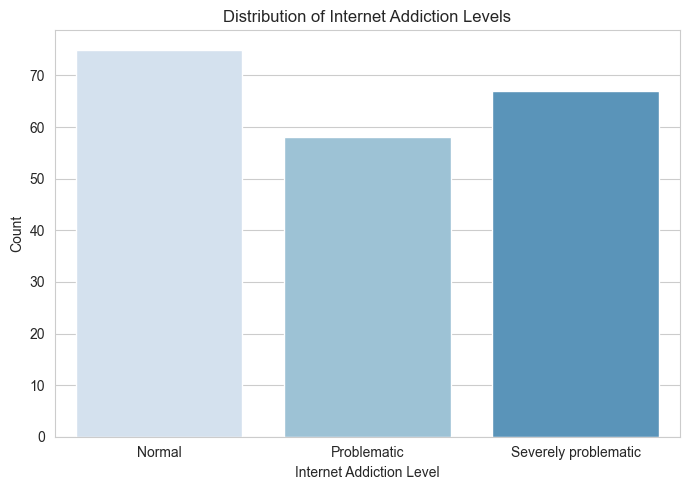

(None,
 addiction_level
 Normal                  75
 Severely problematic    67
 Problematic             58
 Name: count, dtype: int64)

In [29]:
# Define addiction levels based on sum_iat cut-offs
def classify_iat(total):
    if total <= 39:
        return 'Normal'
    elif total <= 69:
        return 'Problematic'
    else:
        return 'Severely problematic'

# Apply classification
df_filtered['addiction_level'] = df_filtered['sum_iat'].apply(classify_iat)

# Group and count occurrences
# Prepare data as DataFrame with explicit columns
order = ['Normal', 'Problematic', 'Severely problematic']
grouped = df_filtered['addiction_level'].value_counts().reindex(order).reset_index() 
# reindex Ensures the Series is re-ordered to match your custom order list (['Normal', 'Problematic', 'Severely problematic']). 

grouped.columns = ['addiction_level', 'count']

# Create the blue gradient palette and create the barplot
blue_palette = sns.color_palette("Blues", n_colors=4)

plt.figure(figsize=(7,5))
sns.barplot(
    data=grouped,
    x='addiction_level',
    y='count',
    hue='addiction_level',
    palette=blue_palette,
    dodge=False,       # Avoids stacked bars
    order=order,
    legend=False
)
plt.xlabel('Internet Addiction Level')
plt.ylabel('Count')
plt.title('Distribution of Internet Addiction Levels')
plt.tight_layout()

plt.show(), df_filtered['addiction_level'].value_counts()

According to IAT Author guidelines there are 75 average users, 58 problematic internet users and 67 severely problematic users in the filtered_df.

## Other psychometric instruments

In [30]:
pgsi_cols = [col for col in df_filtered.columns if col.startswith('pgsi_')]
df_pgsi = df_filtered[pgsi_cols]

pcl5_cols = [col for col in df_filtered.columns if col.startswith('pcl5_')]
df_pcl5 = df_filtered[pcl5_cols]

mspss_cols = [col for col in df_filtered.columns if col.startswith('mspss_')]
df_mspss = df[mspss_cols]

swls_cols = [col for col in df_filtered.columns if col.startswith('swls_')]
df_swls = df[swls_cols]

who5_cols = [col for col in df_filtered.columns if col.startswith('who5_')]
df_who5 = df[who5_cols]

In addition to the IAT, the internal consistency of the other psychometric instruments included in the dataset — namely the WHO-5, MSPSS, SWLS, PCL-5, and PGSI — was assessed using Cronbach’s Alpha. Each of these scales is composed of multiple items rated on a numerical or Likert-type scale, and therefore lends itself to this type of reliability analysis. The Cronbach’s Alpha coefficient provides an estimate of the degree of internal correlation among the items within each instrument, indicating how well they jointly measure the same underlying construct.

In [31]:
cronbach_alpha(df_pgsi), cronbach_alpha(df_pcl5), cronbach_alpha(df_mspss), cronbach_alpha(df_swls), cronbach_alpha(df_who5)

(np.float64(0.8935404063641771),
 np.float64(0.9817491160882883),
 np.float64(0.8841251144236355),
 np.float64(0.7820273835058027),
 np.float64(0.6198655116723186))

The results indicated excellent consistency for the PCL-5 (α = 0.98), good consistency for PGSI (α = 0.89) and MSPSS (α = 0.88) scales, acceptable consistency for the SWLS (α = 0.78) and questionable consistency for the WHO-5 (α = 0.62).
These findings confirm that, overall, the items within each scale consistently measure their intended construct. However, the relatively lower coefficient for the WHO-5 suggests a broader conceptual coverage of well-being, possibly reflecting different facets of positive affect and life satisfaction.

Based on the Cronbach’s Alpha results, the next analytical step was defined according to the internal reliability of each psychometric instrument. 
Scales showing excellent internal consistency (α ≥ 0.9), such as the PCL-5 (α = 0.98), were considered highly homogeneous and unidimensional. In such cases, further item-level correlation analyses were deemed unnecessary, as the items are already strongly interrelated and reflect a single underlying construct.
For scales with good to very good reliability (0.7 ≤ α < 0.9) — including the PGSI (α = 0.89), MSPSS (α = 0.88), and SWLS (α = 0.78) — item-level Spearman correlations were examined to confirm internal coherence and to explore the relative contribution of individual items to the overall construct.
Finally, for the WHO-5 (α = 0.62), whose internal consistency was acceptable but comparatively lower, item-level correlations were computed to better understand the heterogeneity among items and the potential multidimensionality of the well-being construct.

After these reliability-driven evaluations, Spearman correlations between the total scores of all psychometric instruments were computed to assess inter-construct relationships. This two-step approach — reliability check followed by inter-scale correlation — ensures that each scale is internally coherent while verifying that the constructs measured are distinct and non-redundant.

### PGSI

In [32]:
results_pgsi = []
for i in range(1, 10):
    col = f'pgsi_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_pgsi.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_pgsi)
result_df

,column,statistic,p_value,alpha,normal
0,pgsi_1,0.666353,1.229168e-19,0.05,False
1,pgsi_2,0.679333,2.809391e-19,0.05,False
2,pgsi_3,0.660211,8.382582e-20,0.05,False
3,pgsi_4,0.670123,1.558793e-19,0.05,False
4,pgsi_5,0.640373,2.520194e-20,0.05,False
5,pgsi_6,0.676561,2.349786e-19,0.05,False
6,pgsi_7,0.656883,6.827087e-20,0.05,False
7,pgsi_8,0.649518,4.357854e-20,0.05,False
8,pgsi_9,0.647068,3.759280e-20,0.05,False


Minimum Spearman correlation (excluding diagonal): 0.25
Maximum Spearman correlation (excluding diagonal): 0.51


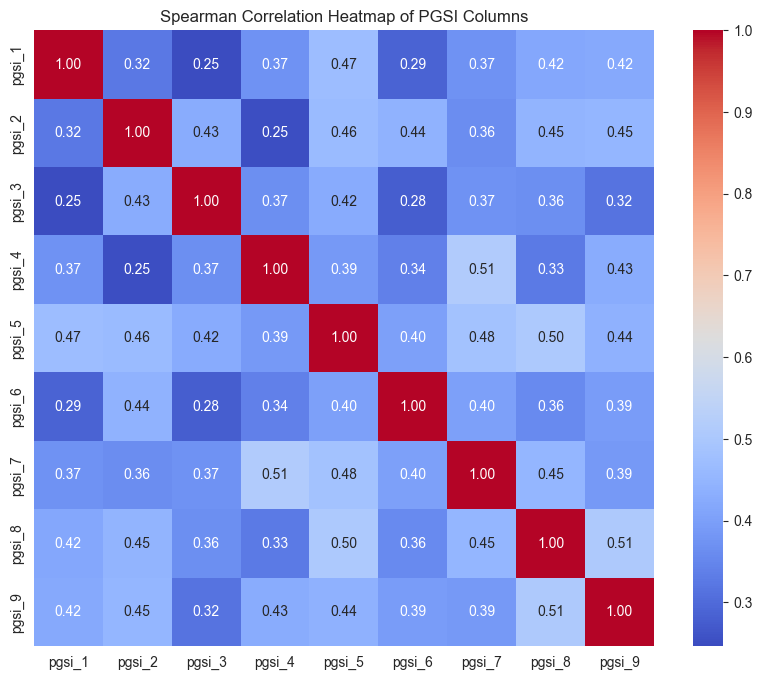

In [33]:
# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_pgsi = df_pgsi.corr(method='spearman')

# Extract upper triangle (excluding diagonal)
corr_values_pgsi = corr_matrix_pgsi.where(~np.eye(corr_matrix_pgsi.shape[0], dtype=bool)).stack()

# Compute min and max
min_corr_pgsi = corr_values_pgsi.min()
max_corr_pgsi = corr_values_pgsi.max()

print(f"Minimum Spearman correlation (excluding diagonal): {min_corr_pgsi:.2f}")
print(f"Maximum Spearman correlation (excluding diagonal): {max_corr_pgsi:.2f}")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pgsi, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of PGSI Columns")
plt.show()

For the PGSI, the internal consistency was excellent (Cronbach’s α = 0.89), confirming that the items coherently measure the underlying construct of problem gambling.
The inter-item Spearman correlations ranged between ρ = 0.25 and ρ = 0.51, indicating moderate positive associations among items. This range supports the Alpha result, showing that while the items are sufficiently related to form a reliable scale, they are not redundant.
Such a pattern reflects a balanced internal structure, where each item contributes unique yet coherent information to the overall score.

### MSPSS

The MSPSS demonstrated good overall internal consistency (Cronbach’s α = 0.884), indicating that the items reliably measure perceived social support. To explore the multidimensional structure of the scale, we examined the internal correlations within each subscale: Significant Other, Family, and Friends.

In [34]:
results_mspss = []
for i in range(1, 13):
    col = f'mspss_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_mspss.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_mspss)
result_df

,column,statistic,p_value,alpha,normal
0,mspss_1,0.842697,1.927019e-13,0.05,False
1,mspss_2,0.852754,5.862194e-13,0.05,False
2,mspss_3,0.834314,7.910998e-14,0.05,False
3,mspss_4,0.834879,8.392332e-14,0.05,False
4,mspss_5,0.866260,2.844809e-12,0.05,False
5,mspss_6,0.847771,3.356605e-13,0.05,False
6,mspss_7,0.835029,8.525084e-14,0.05,False
7,mspss_8,0.856342,8.829355e-13,0.05,False
8,mspss_9,0.839793,1.410390e-13,0.05,False
9,mspss_10,0.834628,8.175248e-14,0.05,False


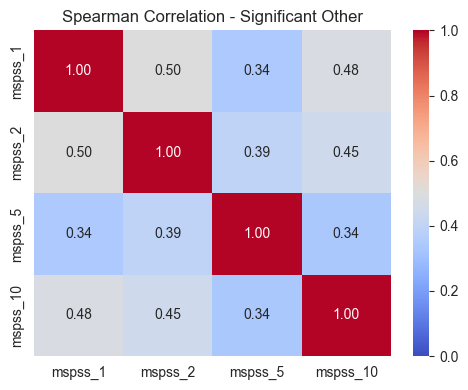

Significant Other - Minimum Spearman correlation (excluding diagonal): 0.34
Significant Other - Maximum Spearman correlation (excluding diagonal): 0.50


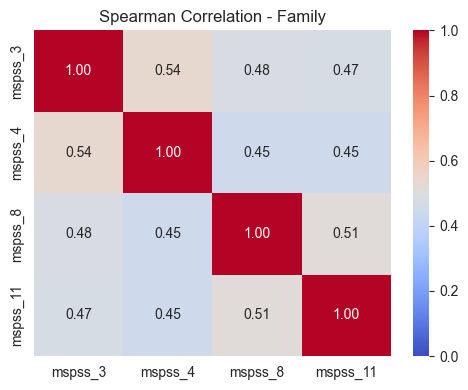

Family - Minimum Spearman correlation (excluding diagonal): 0.45
Family - Maximum Spearman correlation (excluding diagonal): 0.54


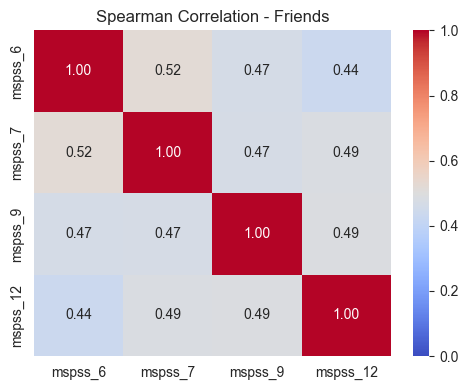

Friends - Minimum Spearman correlation (excluding diagonal): 0.44
Friends - Maximum Spearman correlation (excluding diagonal): 0.52


In [35]:
# Define the subgroups
so_items = [f"mspss_{i}" for i in [1, 2, 5, 10] if f"mspss_{i}" in df_filtered.columns]  # Significant Other
fa_items = [f"mspss_{i}" for i in [3, 4, 8, 11] if f"mspss_{i}" in df_filtered.columns]  # Family
fr_items = [f"mspss_{i}" for i in [6, 7, 9, 12] if f"mspss_{i}" in df_filtered.columns]  # Friends

# Function to plot heatmap
def plot_heatmap(name, cols):
    if not cols:
        print(f"⚠️ No columns found for {name}.")
        return
    corr = df[cols].corr(method='spearman')
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=0, vmax=1)
    plt.title(f"Spearman Correlation - {name}")
    plt.tight_layout()
    plt.show()
    
    # Extract upper triangle (excluding diagonal)
    corr_values = corr.where(~np.eye(corr.shape[0], dtype=bool)).stack()
    
    # Compute min and max
    min_corr = corr_values.min()
    max_corr = corr_values.max()
    
    print(f"{name} - Minimum Spearman correlation (excluding diagonal): {min_corr:.2f}")
    print(f"{name} - Maximum Spearman correlation (excluding diagonal): {max_corr:.2f}")

# Plot heatmaps for each subgroup 
plot_heatmap("Significant Other", so_items)
plot_heatmap("Family", fa_items)
plot_heatmap("Friends", fr_items)

Spearman correlation analyses revealed that within-subscale item correlations were moderate. For the Significant Other subscale, correlations ranged from ρ = 0.34 to 0.50; for Family, from ρ = 0.45 to 0.54; and for Friends, from ρ = 0.44 to 0.52. 
These values suggest that while items within each subscale are related, they are not redundant, reflecting a coherent but diverse measurement of each social support domain.
Overall, the pattern of correlations supports the multidimensional structure of the MSPSS: the subscales capture related but distinct facets of perceived social support, with sufficient internal coherence to justify their use as separate subscale scores.

### SWLS

In [36]:
results_swls = []
for i in range(1, 6):
    col = f'swls_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_swls.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_swls)
result_df

,column,statistic,p_value,alpha,normal
0,swls_1,0.905141,5.408625e-10,0.05,False
1,swls_2,0.913038,1.852238e-09,0.05,False
2,swls_3,0.915247,2.646691e-09,0.05,False
3,swls_4,0.910480,1.233961e-09,0.05,False
4,swls_5,0.913822,2.100912e-09,0.05,False


Minimum Spearman correlation (excluding diagonal): 0.32
Maximum Spearman correlation (excluding diagonal): 0.50


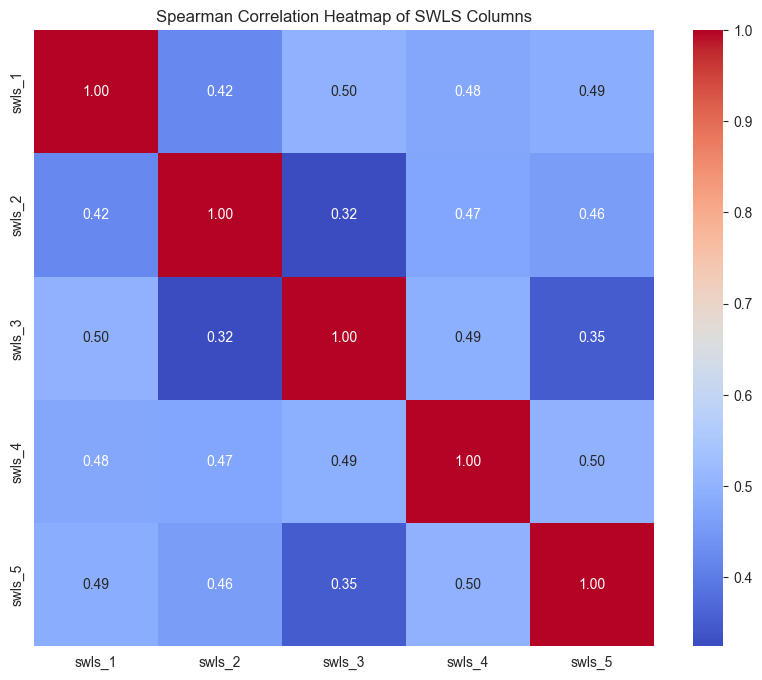

In [37]:
# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_swls = df_swls.corr(method='spearman')

# Extract upper triangle (excluding diagonal)
corr_values_swls = corr_matrix_swls.where(~np.eye(corr_matrix_swls.shape[0], dtype=bool)).stack()

# Compute min and max
min_corr_swls = corr_values_swls.min()
max_corr_swls = corr_values_swls.max()

print(f"Minimum Spearman correlation (excluding diagonal): {min_corr_swls:.2f}")
print(f"Maximum Spearman correlation (excluding diagonal): {max_corr_swls:.2f}")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_swls, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of SWLS Columns")
plt.show()

Within-scale item correlations were moderate, with Spearman values ranging from ρ = 0.32 to 0.50. This pattern suggests that while the items are positively related, they are not redundant, providing complementary information about the construct of life satisfaction.

### WHO_5

In [38]:
results_who5 = []
for i in range(1, 6):
    col = f'who5_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_who5.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_who5)
result_df

,column,statistic,p_value,alpha,normal
0,who5_1,0.910502,1.238197e-09,0.05,False
1,who5_2,0.891271,7.235471e-11,0.05,False
2,who5_3,0.884698,2.956836e-11,0.05,False
3,who5_4,0.893980,1.057137e-10,0.05,False
4,who5_5,0.893064,9.292637e-11,0.05,False


Minimum Spearman correlation (excluding diagonal): 0.16
Maximum Spearman correlation (excluding diagonal): 0.35


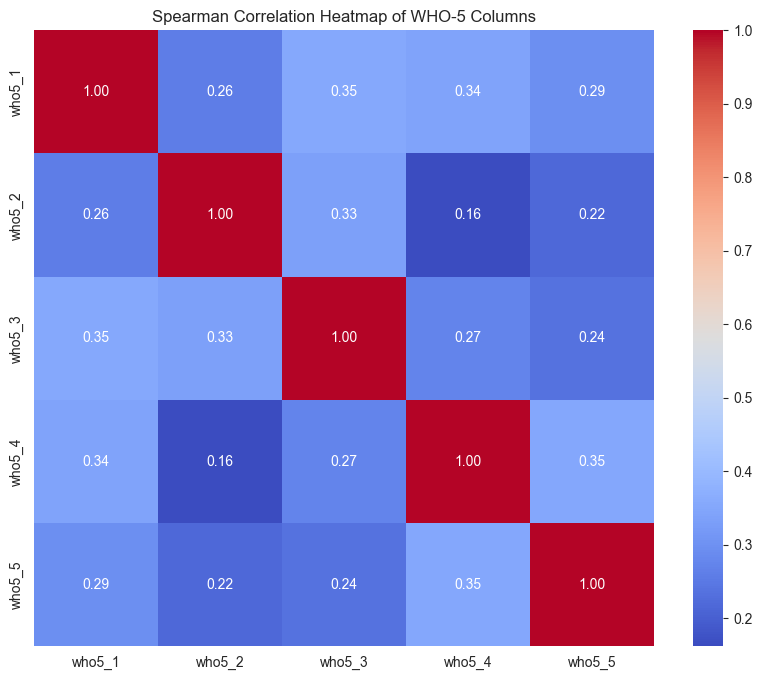

In [39]:
# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_who5 = df_who5.corr(method='spearman')

# Extract upper triangle (excluding diagonal)
corr_values_who5 = corr_matrix_who5.where(~np.eye(corr_matrix_who5.shape[0], dtype=bool)).stack()

# Compute min and max
min_corr_who5 = corr_values_who5.min()
max_corr_who5 = corr_values_who5.max()

print(f"Minimum Spearman correlation (excluding diagonal): {min_corr_who5:.2f}")
print(f"Maximum Spearman correlation (excluding diagonal): {max_corr_who5:.2f}")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_who5, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of WHO-5 Columns")
plt.show()

Within-scale Spearman correlations ranged from ρ = 0.16 to 0.35, suggesting that the items are only weakly to moderately related. This pattern reflects a broader conceptual coverage of well-being, capturing different facets of positive affect and life satisfaction, and highlights the potential multidimensionality of the construct measured by the WHO-5.

### Correlation between IAT and other pshycometric instruments

# DA MANTENERE CREDO

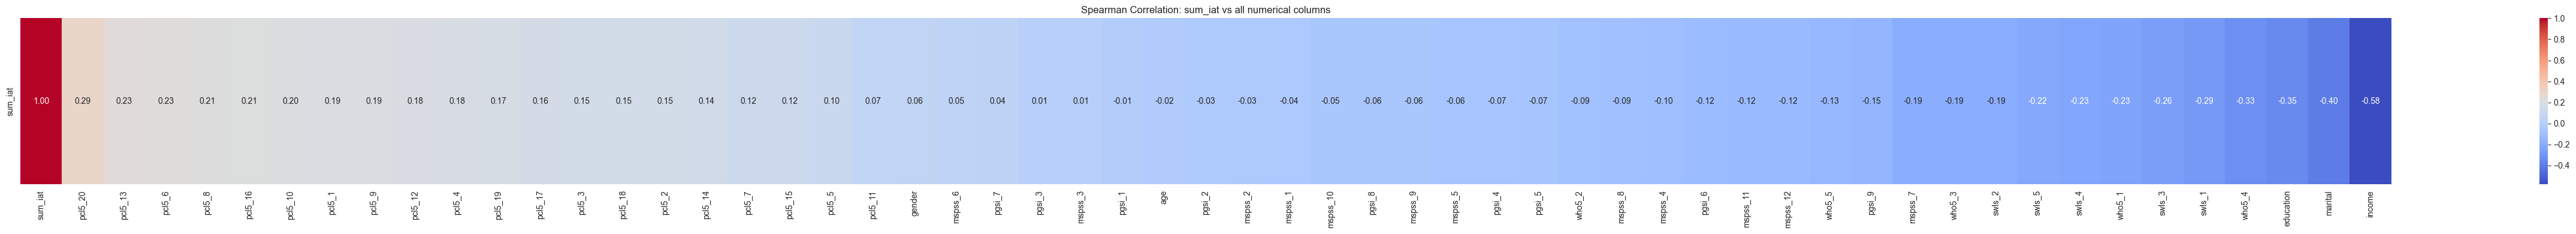

=== Correlazioni forti con sum_iat (|r| >= 0.5) ===
income               → r = -0.58

=== Top 10 correlazioni (per valore assoluto) ===
sum_iat      1.000000
income      -0.578639
marital     -0.402944
education   -0.346252
who5_4      -0.331862
pcl5_20      0.292152
swls_1      -0.285726
swls_3      -0.258095
who5_1      -0.233961
pcl5_13      0.232357
Name: sum_iat, dtype: float64


In [40]:
# ===========================================================
# Correlazione tra IAT totale (sum_iat) e tutte le altre colonne
# - Calcola la correlazione Spearman (non assume normalità)
# - Mostra heatmap delle correlazioni con sum_iat
# - Stampa le correlazioni forti (|r| >= 0.5)
# ===========================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona solo colonne numeriche (esclude label testuali)
num_cols = df_filtered.select_dtypes(include=['number']).columns

# Calcola la correlazione con sum_iat
corr_with_iat = df_filtered[num_cols].corr(method='spearman')['sum_iat'].sort_values(ascending=False)

# Crea un DataFrame per la heatmap
corr_df = corr_with_iat.to_frame().T  # una riga: sum_iat vs tutte le altre
corr_df.index = ['sum_iat']

# --- Plot Heatmap ---
plt.figure(figsize=(50, 4))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Spearman Correlation: sum_iat vs all numerical columns")
plt.tight_layout()
plt.show()

# --- Stampa correlazioni forti ---
threshold = 0.5  # puoi variare la soglia
print("=== Correlazioni forti con sum_iat (|r| >= 0.5) ===")
strong_corrs = corr_with_iat[abs(corr_with_iat) >= threshold]

if not strong_corrs.empty:
    for col, r in strong_corrs.items():
        if col != 'sum_iat':
            print(f"{col:20s} → r = {r:.2f}")
else:
    print("Nessuna correlazione forte trovata (|r| < 0.5).")

# --- (opzionale) Mostra top 10 in ordine assoluto ---
print("\n=== Top 10 correlazioni (per valore assoluto) ===")
print(corr_with_iat.reindex(corr_with_iat.abs().sort_values(ascending=False).index)[:10])


In [41]:

# Mantieni solo soggetti con IAT > 30 (quindi Mild, Moderate, Severe)
df_iat_dep = df_filtered[df_filtered['sum_iat'] > 30]


# Controllo del risultato
print("Righe totali prima:", len(df_filtered))
print("Righe dopo rimozione 'Normal':", len(df_iat_dep))

# Distribuzione aggiornata dei livelli di dipendenza
print("\nDistribuzione residua dei livelli IAT:")
print(df_iat_dep['addiction_level'].value_counts())


Righe totali prima: 200
Righe dopo rimozione 'Normal': 150

Distribuzione residua dei livelli IAT:
addiction_level
Severely problematic    67
Problematic             58
Normal                  25
Name: count, dtype: int64


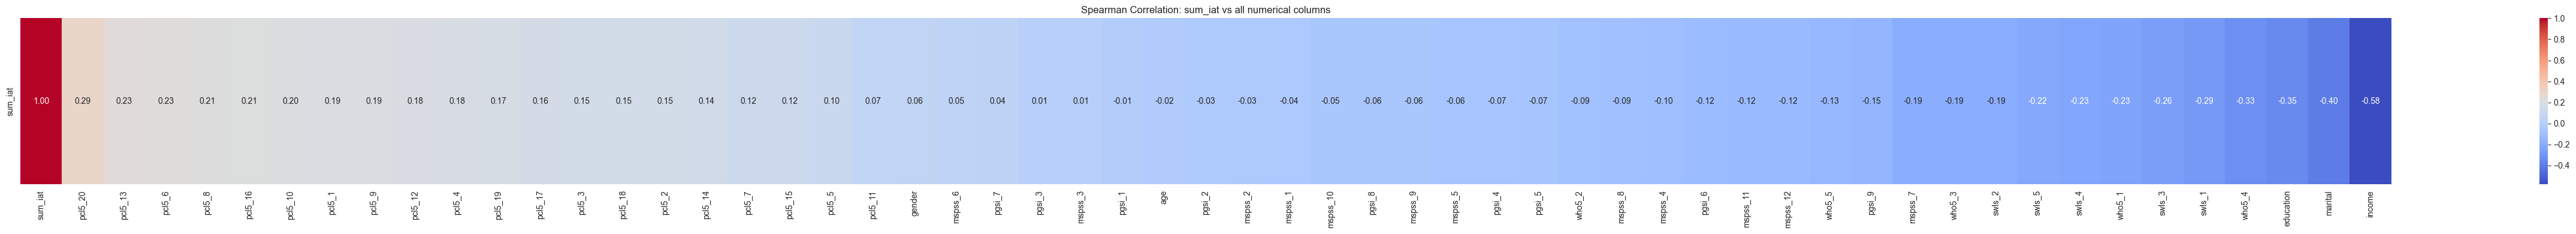

=== Correlazioni forti con sum_iat (|r| >= 0.5) ===
income               → r = -0.58

=== Top 10 correlazioni (per valore assoluto) ===
sum_iat      1.000000
income      -0.578639
marital     -0.402944
education   -0.346252
who5_4      -0.331862
pcl5_20      0.292152
swls_1      -0.285726
swls_3      -0.258095
who5_1      -0.233961
pcl5_13      0.232357
Name: sum_iat, dtype: float64


In [42]:
# ===========================================================
# Correlazione tra IAT totale (sum_iat) e tutte le altre colonne
# - Calcola la correlazione Spearman (non assume normalità)
# - Mostra heatmap delle correlazioni con sum_iat
# - Stampa le correlazioni forti (|r| >= 0.5)
# ===========================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona solo colonne numeriche (esclude label testuali)
num_cols = df_filtered.select_dtypes(include=['number']).columns

# Calcola la correlazione con sum_iat
corr_with_iat = df_filtered[num_cols].corr(method='spearman')['sum_iat'].sort_values(ascending=False)

# Crea un DataFrame per la heatmap
corr_df = corr_with_iat.to_frame().T  # una riga: sum_iat vs tutte le altre
corr_df.index = ['sum_iat']

# --- Plot Heatmap ---
plt.figure(figsize=(50, 4))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Spearman Correlation: sum_iat vs all numerical columns")
plt.tight_layout()
plt.show()

# --- Stampa correlazioni forti ---
threshold = 0.5  # puoi variare la soglia
print("=== Correlazioni forti con sum_iat (|r| >= 0.5) ===")
strong_corrs = corr_with_iat[abs(corr_with_iat) >= threshold]

if not strong_corrs.empty:
    for col, r in strong_corrs.items():
        if col != 'sum_iat':
            print(f"{col:20s} → r = {r:.2f}")
else:
    print("Nessuna correlazione forte trovata (|r| < 0.5).")

# --- (opzionale) Mostra top 10 in ordine assoluto ---
print("\n=== Top 10 correlazioni (per valore assoluto) ===")
print(corr_with_iat.reindex(corr_with_iat.abs().sort_values(ascending=False).index)[:10])


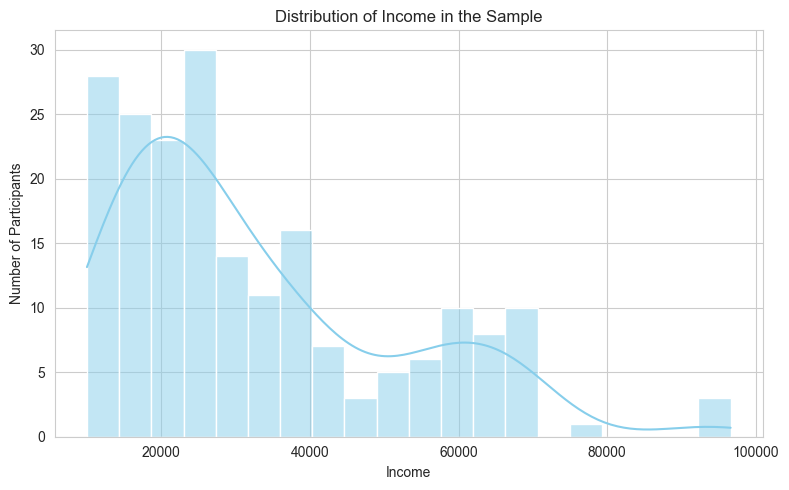

In [43]:
# ------------------------------------------------------------
# In this section, we analyzed how the total Internet Addiction
# score (sum_iat) correlates with the other variables in the dataset.
#
# The only variable showing a relevant correlation was 'income',
# with r = -0.58 (Spearman), indicating a moderate-to-strong
# inverse relationship: individuals with lower income tend to
# report higher levels of Internet addiction.
#
# This suggests that socio-economic factors might influence
# problematic Internet use — people with lower income could
# be more vulnerable due to limited access to alternative
# offline activities or greater reliance on digital spaces.
#
# Given this finding, our subsequent analyses will likely
# focus on participants belonging to lower income brackets.
# ------------------------------------------------------------


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_filtered,
    x='income',
    bins=20,
    kde=True,
    color='skyblue'
)
plt.title('Distribution of Income in the Sample')
plt.xlabel('Income')
plt.ylabel('Number of Participants')
plt.tight_layout()
plt.show()


income_group
Low       65.248789
Medium    64.918789
High      26.583035
Name: sum_iat, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_21356\813098646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['income_group'] = pd.qcut(df_filtered['income'], q=3, labels=['Low', 'Medium', 'High'])
C:\Users\User\AppData\Local\Temp\ipykernel_21356\813098646.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_iat_by_income = df_filtered.groupby('income_group')['sum_iat'].mean()


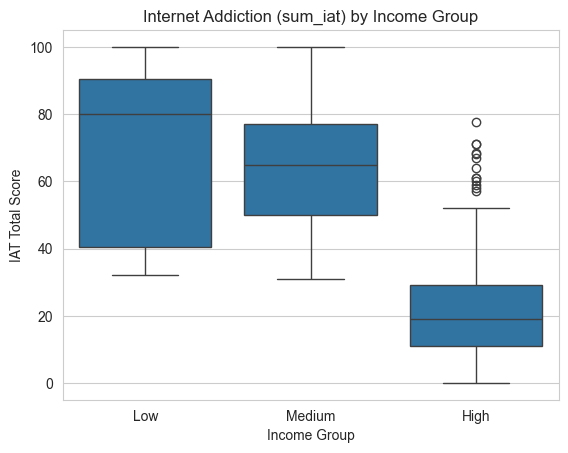

In [44]:
# Crea tre fasce di reddito (quantili)
df_filtered['income_group'] = pd.qcut(df_filtered['income'], q=3, labels=['Low', 'Medium', 'High'])

# Media di IAT per gruppo
mean_iat_by_income = df_filtered.groupby('income_group')['sum_iat'].mean()
print(mean_iat_by_income)

# Boxplot visuale
sns.boxplot(x='income_group', y='sum_iat', data=df_filtered, order=['Low', 'Medium', 'High'])
plt.title('Internet Addiction (sum_iat) by Income Group')
plt.xlabel('Income Group')
plt.ylabel('IAT Total Score')
plt.show()


Spearman correlation (log-income vs sum_iat): r = -0.579, p = 0.0000


C:\Users\User\AppData\Local\Temp\ipykernel_21356\3539797474.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['income_log'] = np.log1p(df_filtered['income'])  # log(1+x)


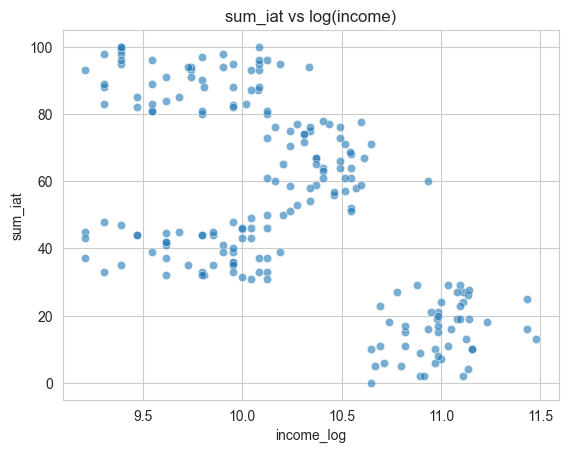

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Evita errori con log(0)
df_filtered['income_log'] = np.log1p(df_filtered['income'])  # log(1+x)

# Correlazione Spearman dopo log-transform
rho, pval = spearmanr(df_filtered['income_log'], df_filtered['sum_iat'], nan_policy='omit')
print(f"Spearman correlation (log-income vs sum_iat): r = {rho:.3f}, p = {pval:.4f}")

# Confronto grafico
sns.scatterplot(x='income_log', y='sum_iat', data=df_filtered, alpha=0.6)
plt.title('sum_iat vs log(income)')
plt.show()


In [46]:
from scipy.stats import kruskal

# Gruppi per income quantili
groups = [g['sum_iat'].dropna() for _, g in df_filtered.groupby('income_group')]

# Test di Kruskal–Wallis (equivalente non parametrico dell’ANOVA)
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis test: H = {stat:.3f}, p = {p:.4f}")

if p < 0.05:
    print("→ Le differenze di IAT tra i gruppi di reddito sono significative.")
else:
    print("→ Nessuna differenza statisticamente significativa tra i gruppi di reddito.")


Kruskal–Wallis test: H = 79.529, p = 0.0000
→ Le differenze di IAT tra i gruppi di reddito sono significative.


C:\Users\User\AppData\Local\Temp\ipykernel_21356\777661334.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g['sum_iat'].dropna() for _, g in df_filtered.groupby('income_group')]


In [47]:
# ================================================================
# 🎯 SCELTA METODOLOGICA: RIDUZIONE DELLE SCALE PSICOLOGICHE
# ================================================================
# 🇮🇹
# In questa fase, le scale psicologiche (PCL-5, MSPSS, SWLS, WHO-5)
# vengono sintetizzate in punteggi totali o medi (es. sum_pcl5, sum_who5, ecc.).
# Questa riduzione non ha finalità statistiche generiche, ma serve a
# semplificare il profilo psicologico per la creazione delle *personas*,
# ossia i tipi di utente che saranno rappresentati nel videogioco.
#
# Mantenere ogni singola domanda renderebbe i cluster molto complessi e
# difficili da interpretare narrativamente, poiché alcune scale (es. PCL-5)
# contengono molte variabili fortemente correlate tra loro.
# Riassumendo ciascuna scala in un indicatore unico, manteniamo
# l’informazione psicologica essenziale (livello generale di stress,
# benessere, soddisfazione, supporto sociale) senza perdere la coerenza
# concettuale con il costrutto misurato.
#
# L’unica eccezione è la scala IAT (Internet Addiction Test), che viene
# mantenuta sia nella forma aggregata (sum_iat) sia nei singoli item,
# poiché è centrale per la tipizzazione comportamentale dei personaggi
# e per l’analisi dei diversi modi in cui si manifesta la dipendenza.
#
# 🇬🇧
# In this phase, psychological scales (PCL-5, MSPSS, SWLS, WHO-5)
# are reduced to total or average scores (e.g., sum_pcl5, sum_who5, etc.).
# This reduction is **not a statistical simplification per se**, but a
# methodological choice aimed at creating clear and interpretable *personas*,
# i.e., user types represented within the visual novel.
#
# Keeping every single questionnaire item would make the clusters
# overly complex and hard to interpret narratively, since some scales
# (like PCL-5) contain many highly correlated items.
# Summarizing each scale into one indicator preserves the essential
# psychological information (overall stress, well-being, satisfaction,
# social support) while keeping the analysis coherent and readable.
#
# The only exception is the IAT (Internet Addiction Test), which is
# retained both in its total form (sum_iat) and at the item level,
# since it is the central construct for behavioral profiling and
# the identification of different patterns of Internet use in the game.
# ================================================================

# 🇮🇹 Creiamo i punteggi sintetici per ciascuna scala psicometrica.
# 🇬🇧 Create synthetic / total scores for each psychometric scale.

# PGSI – gambling
df_filtered['sum_pgsi'] = df_filtered[[c for c in df_filtered.columns
                                       if c.startswith('pgsi_')]].sum(axis=1)

# PCL-5 – post-traumatic stress symptoms
df_filtered['sum_pcl5'] = df_filtered[[c for c in df_filtered.columns
                                       if c.startswith('pcl5_')]].sum(axis=1)

# MSPSS – perceived social support
df_filtered['sum_mspss'] = df_filtered[[c for c in df_filtered.columns
                                        if c.startswith('mspss_')]].sum(axis=1)

# SWLS – life satisfaction
df_filtered['sum_swls'] = df_filtered[[c for c in df_filtered.columns
                                       if c.startswith('swls_')]].sum(axis=1)

# WHO-5 – psychological well-being
df_filtered['sum_who5'] = df_filtered[[c for c in df_filtered.columns
                                       if c.startswith('who5_')]].sum(axis=1)

# Controllo veloce
df_filtered[['sum_iat',
             'sum_pgsi',
             'sum_pcl5',
             'sum_mspss',
             'sum_swls',
             'sum_who5']].describe().T


C:\Users\User\AppData\Local\Temp\ipykernel_21356\710856210.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sum_pgsi'] = df_filtered[[c for c in df_filtered.columns
C:\Users\User\AppData\Local\Temp\ipykernel_21356\710856210.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sum_pcl5'] = df_filtered[[c for c in df_filtered.columns
C:\Users\User\AppData\Local\Temp\ipykernel_21356\710856210.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,count,mean,std,min,25%,50%,75%,max
sum_iat,200.0,52.576819,28.821201,0.0,30.50,49.5,78.50,100.0
sum_pgsi,200.0,6.155000,7.018352,0.0,0.75,4.0,7.25,27.0
sum_pcl5,200.0,19.115000,24.882877,0.0,4.00,7.0,15.75,80.0
sum_mspss,200.0,53.528924,19.946584,12.0,37.00,59.5,68.25,84.0
sum_swls,200.0,19.373568,8.329036,5.0,13.00,19.5,25.25,35.0
sum_who5,200.0,13.887005,5.224884,6.0,10.00,13.5,18.00,23.0


In [50]:
# ================================================================
# PREPARAZIONE DEI DATI PER IL CLUSTERING / DATA PREPARATION FOR CLUSTERING
# ================================================================
# 🇮🇹 In questa fase selezioniamo solo le variabili che vogliamo usare per
# creare i gruppi (cluster). Usiamo:
# - le somme delle scale psicologiche (perché rappresentano in modo compatto i costrutti)
# - età e reddito (per dare un contesto socio-demografico ai cluster)
# Questi cluster saranno poi trasformati in personas per il videogioco.
#
# 🇬🇧 In this step we select only the variables we want to use to build
# the groups (clusters). We use:
# - the total scores of the psychological scales (compact representation of constructs)
# - age and income (to add sociodemographic context to the clusters)
# These clusters will later be turned into personas for the game.

cluster_vars = [
    'sum_iat',   # Internet addiction
    'sum_pcl5',  # Post-traumatic / stress symptoms
    'sum_mspss', # Perceived social support
    'sum_swls',  # Life satisfaction
    'sum_who5',  # Psychological well-being
    'sum_pgsi',  # Gambling severity
    'age',       # Age
    'income'     # Income
]

# 🇮🇹 Creiamo un dataframe limitato solo a queste colonne, così lavoriamo pulito.
# 🇬🇧 Create a dataframe with these columns only, so we work on a clean subset.
df_cluster = df_filtered[cluster_vars].copy()

# ================================================================
# GESTIONE DEI VALORI MANCANTI / HANDLING MISSING VALUES
# ================================================================
# 🇮🇹 Le colonne-somma (sum_iat, sum_pcl5, ecc.) sono state calcolate a partire da
# più item. Se anche solo uno di quegli item era mancante, la somma può essere NaN.
# Per il clustering ci servono righe complete (tutte le variabili presenti),
# quindi eliminiamo le righe con NaN in questo sotto-dataset.
#
# 🇬🇧 The total-score columns (sum_iat, sum_pcl5, etc.) were computed from multiple items.
# If any of those items was missing, the resulting total can be NaN.
# Clustering needs complete rows (all variables present), so we drop rows with NaNs
# in this subset.

df_cluster = df_cluster.dropna().reset_index(drop=True)

print(f"✅ Dataset pronto per il clustering: {df_cluster.shape[0]} righe, {df_cluster.shape[1]} variabili.")

# ================================================================
# STANDARDIZZAZIONE DELLE VARIABILI / FEATURE STANDARDIZATION
# ================================================================
# 🇮🇹 Le variabili sono su scale molto diverse (es. reddito può essere migliaia,
# WHO-5 solo 0–25). Se non le standardizziamo, il clustering verrebbe guidato
# quasi solo dal reddito. Quindi portiamo tutto su media=0 e dev.std=1.
#
# 🇬🇧 Variables are on very different scales (e.g. income can be thousands,
# WHO-5 is small). Without standardization, clustering would be driven mostly
# by income. So we scale everything to mean=0 and std=1.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# 🇮🇹 Per comodità ricreiamo un DataFrame con i nomi originali delle colonne.
# 🇬🇧 For convenience we recreate a DataFrame with the original column names.
df_cluster_scaled = pd.DataFrame(X_scaled, columns=cluster_vars)

print("✅ Variabili standardizzate: pronte per il K-Means / Variables standardized: ready for K-Means.")


✅ Dataset pronto per il clustering: 200 righe, 8 variabili.
✅ Variabili standardizzate: pronte per il K-Means / Variables standardized: ready for K-Means.


In [51]:
# ================================================================
# CLUSTERING CON K-MEANS / K-MEANS CLUSTERING
# ================================================================
# 🇮🇹 A questo punto abbiamo i dati standardizzati (df_cluster_scaled) e possiamo
# applicare il K-Means per dividere i soggetti in 4 gruppi. Il numero 4 è scelto
# perché ci serve avere 4 personas da descrivere nel gioco; non è “l’unico” numero
# possibile, ma è quello funzionale al progetto narrativo.
#
# 🇬🇧 At this point we have standardized data (df_cluster_scaled) and we can run
# K-Means to split participants into 4 groups. We choose 4 because we want to end up
# with 4 personas for the game; it’s a functional choice, not the only possible one.

from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=4,      # 🇮🇹 vogliamo 4 gruppi / 🇬🇧 we want 4 groups
    random_state=42,   # 🇮🇹 per avere risultati ripetibili / 🇬🇧 reproducible results
    n_init=10          # 🇮🇹 più lanci interni per stabilità / 🇬🇧 multiple inits for stability
)

cluster_labels = kmeans.fit_predict(df_cluster_scaled)

# ================================================================
# ASSEGNAZIONE DEI CLUSTER AL DATAFRAME ORIGINALE
# ================================================================
# 🇮🇹 df_cluster e df_cluster_scaled sono versioni "ridotte" (hanno solo le righe
# complete). Dobbiamo riportare le etichette di cluster dentro df_filtered,
# sulle stesse righe.
#
# 🇬🇧 df_cluster and df_cluster_scaled are "reduced" versions (only complete rows).
# We now need to bring the cluster labels back into df_filtered on the same rows.

# creiamo una colonna cluster nel dataframe ridotto
df_cluster_scaled['cluster'] = cluster_labels

# adesso la assegnamo al df originale, sfruttando gli stessi indici
df_filtered.loc[df_cluster.index, 'cluster'] = cluster_labels

print("✅ Clustering completato e assegnato a df_filtered.")


✅ Clustering completato e assegnato a df_filtered.


C:\Users\User\AppData\Local\Temp\ipykernel_21356\2743128988.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[df_cluster.index, 'cluster'] = cluster_labels


In [52]:
# ================================================================
# VERIFICA DEI CLUSTER / CLUSTER CHECK
# ================================================================
# 🇮🇹 Controlliamo quante osservazioni ci sono in ciascun cluster.
# 🇬🇧 Check how many observations fall into each cluster.

print(df_filtered['cluster'].value_counts().sort_index())


cluster
0.0    50
1.0    50
2.0    50
3.0    50
Name: count, dtype: int64


📊 Inertia (varianza interna totale): 383.53
🧭 Silhouette score (0–1): 0.552


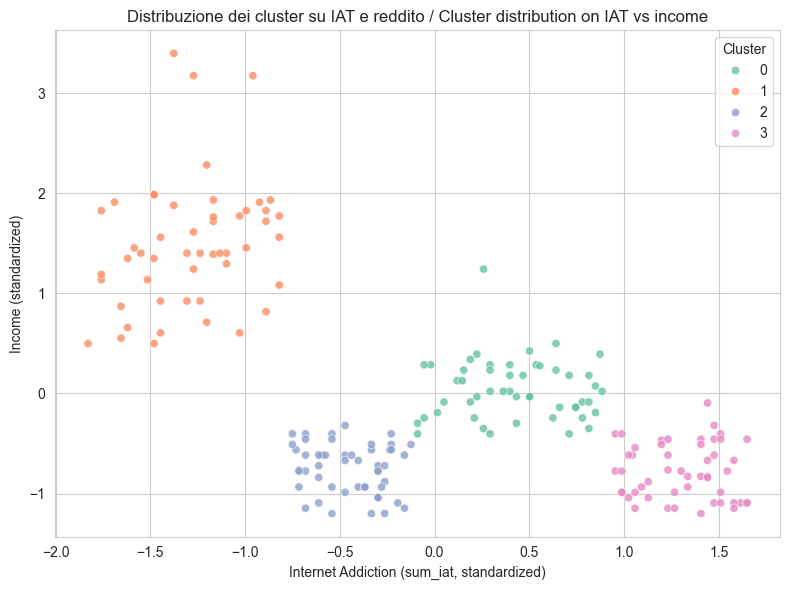

In [53]:
# ================================================================
# 🔍 CONTROLLO QUALITÀ DEL CLUSTERING / CLUSTER QUALITY CHECK
# ================================================================
# 🇮🇹 Se i cluster risultano troppo uguali in dimensione (es. 50–50–50–50),
# è possibile che K-Means stia forzando la separazione senza una reale struttura nei dati.
# Per verificarlo, analizziamo:
#   - la metrica "inertia" (varianza interna totale)
#   - il "silhouette score" (quanto sono distinti i cluster tra loro)
# e visualizziamo il risultato su due dimensioni chiave (sum_iat e income).
#
# 🇬🇧 If clusters have almost identical sizes (e.g., 50–50–50–50),
# K-Means might be forcing boundaries without a strong natural structure.
# To check this, we:
#   - inspect "inertia" (total within-cluster variance)
#   - compute "silhouette score" (how well-separated clusters are)
# and visualize them on two key variables (sum_iat and income).

from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------
# 📈 METRICHE DI QUALITÀ / QUALITY METRICS
# ------------------------------------------------
inertia = kmeans.inertia_
silhouette = silhouette_score(df_cluster_scaled, cluster_labels)

print(f"📊 Inertia (varianza interna totale): {inertia:.2f}")
print(f"🧭 Silhouette score (0–1): {silhouette:.3f}")

# 🇮🇹 Un silhouette > 0.25 indica una separazione ragionevole,
# > 0.4 buona, > 0.6 molto buona. Sotto 0.20 suggerisce cluster sovrapposti.
# 🇬🇧 Silhouette > 0.25 = reasonable, > 0.4 = good, > 0.6 = very good.
# Below 0.20 suggests overlapping clusters.

# ------------------------------------------------
# 🎨 VISUALIZZAZIONE 2D / 2D VISUALIZATION
# ------------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_cluster_scaled,
    x='sum_iat',
    y='income',
    hue=cluster_labels,
    palette='Set2',
    alpha=0.8
)
plt.title("Distribuzione dei cluster su IAT e reddito / Cluster distribution on IAT vs income")
plt.xlabel("Internet Addiction (sum_iat, standardized)")
plt.ylabel("Income (standardized)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [54]:
# ================================================================
# DESCRIZIONE DEI CLUSTER / CLUSTER SUMMARY
# ================================================================
# 🇮🇹 Ora che abbiamo assegnato i cluster, analizziamo i profili di ciascun gruppo.
# Per ogni cluster calcoliamo la media (o mediana) delle variabili principali
# per capire come differiscono tra loro. Questo ci aiuterà a dare
# un'identità narrativa (persona) a ciascun cluster.
#
# 🇬🇧 Now that we have assigned clusters, let's analyze each group's profile.
# For each cluster, we compute the mean (or median) of key variables
# to understand how they differ. This will later help us define
# narrative personas for the game.

cols_to_summarize = [
    'sum_iat',   # Internet addiction
    'sum_pcl5',  # Stress / traumatic symptoms
    'sum_mspss', # Social support
    'sum_swls',  # Life satisfaction
    'sum_who5',  # Well-being
    'sum_pgsi',  # Gambling
    'age',       # Age
    'income'     # Income
]

# 🇮🇹 Calcolo delle medie e deviazioni standard per ogni cluster
# 🇬🇧 Compute mean and std for each cluster
cluster_summary = (
    df_filtered
    .groupby('cluster')[cols_to_summarize]
    .agg(['mean', 'std', 'count'])
    .round(2)
)

print("=== 🇮🇹 Riassunto statistico per cluster / 🇬🇧 Cluster summary ===")
display(cluster_summary)


=== 🇮🇹 Riassunto statistico per cluster / 🇬🇧 Cluster summary ===


sum_iat             sum_pcl5              sum_mspss              \
           mean   std count     mean    std count      mean   std count   
cluster                                                                   
0.0       64.83  8.42    50    60.32  13.22    50     25.02  7.40    50   
1.0       15.63  8.31    50     5.56   2.92    50     70.30  7.82    50   
2.0       39.61  5.44    50     5.38   3.14    50     48.68  6.46    50   
3.0       90.23  6.29    50     5.20   3.37    50     70.11  6.12    50   

        sum_swls  ... sum_who5 sum_pgsi                age              \
            mean  ...    count     mean   std count   mean   std count   
cluster           ...                                                    
0.0        12.36  ...       50     0.00  0.00    50  28.96  7.02    50   
1.0        30.04  ...       50     2.28  1.09    50  29.20  7.38    50   
2.0        12.22  ...       50    16.50  5.90    50  28.27  6.97    50   
3.0        22.88  ...       50     5.84  0.89    50  28.00  6.36    50   

           income                  
             mean       std count  
cluster                            
0.0      33388.00   5671.76    50  
1.0      60555.98  12105.81    50  
2.0      18552.00   4633.96    50  
3.0      17891.98   5236.59    50  

[4 rows x 24 columns]

In [55]:
# ================================================================
#  PERSONAS
# ================================================================
# 🇮🇹 Creiamo una mini-descrizione numerica di ciascun cluster:
# medie dei punteggi principali + età e reddito medi.
# 🇬🇧 Create a short numeric snapshot of each cluster:
# means of main scores + average age and income.

for c in sorted(df_filtered['cluster'].dropna().unique()):
    sub = df_filtered[df_filtered['cluster'] == c]
    print(f"\n🧩 CLUSTER {int(c)}")
    print(f"n = {len(sub)}")
    print(f"IAT medio / avg IAT:               {sub['sum_iat'].mean():.1f}")
    print(f"Stress (PCL-5):                    {sub['sum_pcl5'].mean():.1f}")
    print(f"Supporto sociale / social support: {sub['sum_mspss'].mean():.1f}")
    print(f"Soddisfazione di vita / SWLS:      {sub['sum_swls'].mean():.1f}")
    print(f"Benessere WHO-5:                   {sub['sum_who5'].mean():.1f}")
    print(f"Gambling PGSI:                     {sub['sum_pgsi'].mean():.1f}")
    print(f"Età media / avg age:               {sub['age'].mean():.1f}")
    print(f"Reddito medio / avg income:        {sub['income'].mean():.1f}")



🧩 CLUSTER 0
n = 50
IAT medio / avg IAT:               64.8
Stress (PCL-5):                    60.3
Supporto sociale / social support: 25.0
Soddisfazione di vita / SWLS:      12.4
Benessere WHO-5:                   9.5
Gambling PGSI:                     0.0
Età media / avg age:               29.0
Reddito medio / avg income:        33388.0

🧩 CLUSTER 1
n = 50
IAT medio / avg IAT:               15.6
Stress (PCL-5):                    5.6
Supporto sociale / social support: 70.3
Soddisfazione di vita / SWLS:      30.0
Benessere WHO-5:                   20.9
Gambling PGSI:                     2.3
Età media / avg age:               29.2
Reddito medio / avg income:        60556.0

🧩 CLUSTER 2
n = 50
IAT medio / avg IAT:               39.6
Stress (PCL-5):                    5.4
Supporto sociale / social support: 48.7
Soddisfazione di vita / SWLS:      12.2
Benessere WHO-5:                   9.3
Gambling PGSI:                     16.5
Età media / avg age:               28.3
Reddito medio / avg 